In [1]:
# funciones para importar las datos
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as pltb

In [2]:
path='../input/PoetryFoundationData.csv'
df=pd.read_csv(path)
df=df.drop(['Unnamed: 0'],axis=1)
df.Title=df.Title.apply(lambda x: x.replace('\r\r\n',''))
df.index.name='idPoem'
# clean the title column
df.Title=df.Title.apply(lambda x: x.replace('\r\r\n','').strip())
df.index.name='idPoem'
df=df.reset_index()
df=df.set_index(['idPoem','Poet'])

In [3]:
def fit_Poem(poem):
    poem_fit= " ".join(re.split('\W+', poem))
    poem_fit=poem_fit.strip()
    poem_fit=poem_fit.replace('\r','\n')
    poem_fit=poem_fit.replace('\n\n','\n' )
    return poem_fit

df['Poem_fit']=df['Poem'].apply(fit_Poem)

In [4]:
# Create the variable of numbers of lines by poem
df['count_l']=df['Poem'].apply(lambda x:  len(x.split('\r\r\n')))
# Create the column with numbers of words
count_words=lambda x : len(x.replace('\n',' ').replace('  ',' ').split(' '))
df['count_w']=df['Poem_fit'].apply(count_words)
#Create the column with number of unique words
count_unique_words=lambda x : len(set(x.replace('\n',' ').replace ('  ',' ').split(' ')))
df['count_wu']=df['Poem_fit'].apply(count_unique_words)
# Create the variable "complexity": numbers of unique words by total number of words
df['complexity']=df[['count_w', 'count_wu']].apply(lambda x : x['count_wu']/x['count_w'],axis=1)
df=df.loc[df.count_w>3]

In [15]:
df=df.drop(df.loc[df.Title=='!'].index)
df=df.drop(df.loc[df.Title=='0'].index)

In [19]:
authors=set([e[1] for e in df.index])
df_au_ye = pd.read_csv('../data/byear_wiki.csv')
df_au_ye2 = pd.read_csv('../data/byear_pfun.csv')
df_year = pd.concat([df_au_ye,df_au_ye2])

,Unnamed: 0,Poet,birthday
0,0,Robbie Coburn,1994-06-25 00:00:00
1,1,Nick Flynn,1960-01-26 00:00:00
2,2,Dorothy Parker,1893-08-22 00:00:00
3,3,Ron Rash,1953-09-25 00:00:00
4,4,Thomas Hood,1799-05-23 00:00:00
...,...,...,...
3122,3122,Hershman%20John,/poets/hershman-john
3123,3123,Emily%20Fragos,/poets/emily-fragos
3124,3124,Henry%20Wadsworth%20Longfellow,/poets/henry-wadsworth-longfellow
3125,3125,Ray%20Gonzalez,/poets/ray-gonzalez


In [26]:
def convierte(x):
    if isinstance(x,str):
        if len(re.findall(r"[0-9]",x[:4]))==4:
            return int(x[:4])
    return None

df_year['year'] = df_year['birthday'].apply(lambda x:convierte(x))

,Unnamed: 0,Poet,birthday,year
0,0,Robbie Coburn,1994-06-25 00:00:00,1994.0
1,1,Nick Flynn,1960-01-26 00:00:00,1960.0
2,2,Dorothy Parker,1893-08-22 00:00:00,1893.0
3,3,Ron Rash,1953-09-25 00:00:00,1953.0
4,4,Thomas Hood,1799-05-23 00:00:00,1799.0
...,...,...,...,...
3122,3122,Hershman%20John,/poets/hershman-john,NaN
3123,3123,Emily%20Fragos,/poets/emily-fragos,NaN
3124,3124,Henry%20Wadsworth%20Longfellow,/poets/henry-wadsworth-longfellow,NaN
3125,3125,Ray%20Gonzalez,/poets/ray-gonzalez,NaN


In [30]:
df_year.columns

Index(['Unnamed: 0', 'birthday', 'year'], dtype='object')

In [31]:
df_year = df_year.drop(['birthday'],axis=1)

In [32]:
df_year = df_year.drop_duplicates()
df_year = df_year.set_index(['Poet'])
df_year

,Unnamed: 0,year
Poet,,
Robbie Coburn,0,1994.0
Nick Flynn,1,1960.0
Dorothy Parker,2,1893.0
Ron Rash,3,1953.0
Thomas Hood,4,1799.0
...,...,...
Hershman%20John,3122,NaN
Emily%20Fragos,3123,NaN
Henry%20Wadsworth%20Longfellow,3124,NaN


In [43]:
df_year = df_year.drop(['Unnamed: 0'],axis=1)


,Poet,year
0,Robbie Coburn,1994.0
1,Nick Flynn,1960.0
2,Dorothy Parker,1893.0
3,Ron Rash,1953.0
4,Thomas Hood,1799.0
...,...,...
3812,Hershman%20John,NaN
3813,Emily%20Fragos,NaN
3814,Henry%20Wadsworth%20Longfellow,NaN
3815,Ray%20Gonzalez,NaN


In [45]:
df=df.reset_index()
df_year=df_year.reset_index()
df = df.set_index(['Poet']).join(df_year.set_index(['Poet']))


,idPoem,Title,Poem,Tags,Poem_fit,count_l,count_w,count_wu,complexity,year
Poet,,,,,,,,,,
Cynthia Rylant,8657,Wax Lips,\r\r\nTodd’s Hardware was dust and a monkey— a...,"Living,Coming of Age,Relationships,Friends & E...",Todd s Hardware was dust and a monkey a real o...,3,85,59,0.694118,NaN
A. B. Spellman,10491,Groovin’ Low,\r\r\nmy swing is more mellow\r\r\nthese days:...,"Arts & Sciences,Music,Social Commentaries,Popu...",my swing is more mellow these days not the har...,25,155,96,0.619355,1935.0
A. E. Housman,870,A Shropshire Lad 19: The time you won your tow...,\r\r\nThe time you won your town the race We c...,NaN,The time you won your town the race We chaired...,3,179,132,0.737430,1859.0
A. E. Housman,2579,Epitaph on an Army of Mercenaries,"\r\r\nThese, in the days when heaven was falli...","Social Commentaries,History & Politics,Money &...",These in the days when heaven was falling The ...,4,53,43,0.811321,1859.0
A. E. Housman,2669,“Soldier from the wars returning”,"\r\r\nSoldier from the wars returning,Spoiler ...","Social Commentaries,War & Conflict",Soldier from the wars returning Spoiler of the...,3,95,66,0.694737,1859.0
...,...,...,...,...,...,...,...,...,...,...
sam sax,6352,On PrEP or on Prayer [“when i say pre-exposure...,\r\r\nwhen i say pre-exposure prophylaxis\r\r\...,"Living,Death,Health & Illness,Life Choices,The...",when i say pre exposure prophylaxis you thinke...,10,162,117,0.722222,NaN
torrin a. greathouse,4409,On Confinement,\r\r\nI sit across the table from my partner\r...,"Living,Health & Illness,Separation & Divorce,T...",I sit across the table from my partner in the ...,151,543,308,0.567219,NaN
Álvaro de Campos,11918,“Ah Margarida”,"\r\r\nAh Margarida, If I gave you my life, ...","Relationships,Men & Women,Arts & Sciences,Poet...",Ah Margarida If I gave you my life What would ...,3,136,88,0.647059,1890.0


In [74]:
df_grap=df.groupby('year').mean()
df_grap=df_grap.reset_index()
df_grap['decade']=df_grap.year.apply(lambda x: 10*int(x/10))
df_grap=df_grap.drop(['idPoem','year','count_w','count_wu','count_l'], axis=1)
data_grap=df_grap.groupby('decade').mean()
x=list(data_grap.index)
y=list(data_grap['complexity'].values)

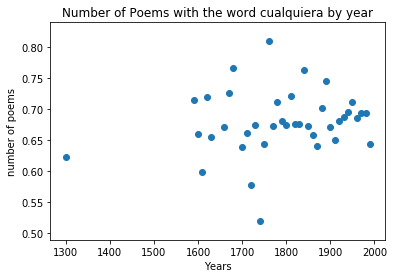

In [77]:
word='cualquiera'
pltb.scatter(x,y)
pltb.title(f"Number of Poems with the word {word} by year")
pltb.ylabel('number of poems')
pltb.xlabel('Years')
pltb.savefig('../output/f_uw.png', bbox_inches='tight')


In [97]:
df=df.loc[df.year>1939]
df=df.loc[df.year<1950]
grap=df.groupby(level='Poet').count()
grap=grap.sort_values(by=['Poem'],ascending=False)
y=list(grap.Poem.values)[:10]
x=list(grap.index)[:10]
y
x

['Rae Armantrout',
 'Yusef Komunyakaa',
 'Kay Ryan',
 'Frank Stanford',
 'Billy Collins',
 'Alice Notley',
 'Juan Felipe Herrera',
 'Heather McHugh',
 'Louise Glück',
 'Derek Mahon']

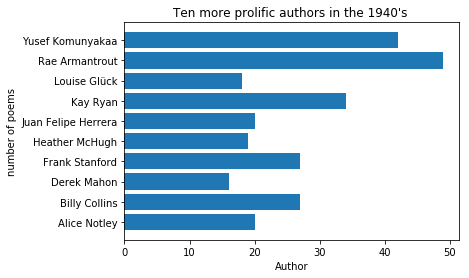

In [98]:
year_pa=1945
decade = 10*int(year_pa/10)
pltb.barh(x,y)
pltb.title(f"Ten more prolific authors bin the {decade}'s ")
pltb.ylabel('number of poems')
pltb.xlabel('Author')
pltb.savefig('../output/f_year.png', bbox_inches='tight')


In [106]:
word='tired'
df_uw = pd.read_csv('../data/unique_words.csv')
df_uws = df_uw.loc[df_uw['unique word']==word]
print(df_uws.columns)
df_uws_w=df_uws.groupby(['id_Poem']).count()
df_uws_w


Index(['id_Poem', 'unique word'], dtype='object')


,idPoem,Title,Poem,Tags,Poem_fit,count_l,count_w,count_wu,complexity,year
Poet,,,,,,,,,,
Adam Zagajewski,4732,Night Is a Cistern,\r\r\nNight is a cistern. Owls sing. Refugees ...,NaN,Night is a cistern Owls sing Refugees tread me...,3,87,71,0.816092,1945.0
Adam Zagajewski,4733,Submerged City,"\r\r\nThat city will be no more, no halos o...",NaN,That city will be no more no halos of spring m...,3,132,98,0.742424,1945.0
Adam Zagajewski,4734,"Evening, Stary Sacz","\r\r\nThe sun sets behind the market square, a...",NaN,The sun sets behind the market square and the ...,3,111,89,0.801802,1945.0
Adam Zagajewski,8224,To Go to Lvov,\r\r\nTo go to Lvov. Which station\r\r\nfor Lv...,"Activities,Travels & Journeys",To go to Lvov Which station for Lvov if not in...,85,597,343,0.574539,1945.0
Adam Zagajewski,8225,Autumn,\r\r\nAutumn is always too early.\r\r\nThe peo...,"Nature,Fall",Autumn is always too early The peonies are sti...,31,136,109,0.801471,1945.0
...,...,...,...,...,...,...,...,...,...,...
Yusef Komunyakaa,13521,Instructions for Building Straw Huts,\r\r\nFirst you must have\r\r\nunbelievable fa...,NaN,First you must have unbelievable faith in wate...,28,147,103,0.700680,1941.0
Yusef Komunyakaa,13522,Toys in a Field,\r\r\nUsing the gun mounts\r\r\nfor monkey bar...,"Living,Philosophy,Social Commentaries,War & Co...",Using the gun mounts for monkey bars children ...,20,68,58,0.852941,1941.0
Yusef Komunyakaa,13523,Please,"\r\r\nForgive me, soldier.\r\r\nForgive my rig...","Relationships,Friends & Enemies,Social Comment...",Forgive me soldier Forgive my right hand for p...,36,160,124,0.775000,1941.0
